In [46]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from nltk.corpus import wordnet as wn

In [47]:
dog = wn.synset('dog.n.01')

In [48]:
dog?

Type:        Synset
String form: Synset('dog.n.01')
File:        ~/anaconda3/envs/venv_hn_tensor_factorisation/lib/python3.7/site-packages/nltk/corpus/reader/wordnet.py
Docstring:  
Create a Synset from a "<lemma>.<pos>.<number>" string where:
<lemma> is the word's morphological stem
<pos> is one of the module attributes ADJ, ADJ_SAT, ADV, NOUN or VERB
<number> is the sense number, counting from 0.

Synset attributes, accessible via methods with the same name:

- name: The canonical name of this synset, formed using the first lemma
  of this synset. Note that this may be different from the name
  passed to the constructor if that string used a different lemma to
  identify the synset.
- pos: The synset's part of speech, matching one of the module level
  attributes ADJ, ADJ_SAT, ADV, NOUN or VERB.
- lemmas: A list of the Lemma objects for this synset.
- definition: The definition for this synset.
- examples: A list of example strings for this synset.
- offset: The offset in the WordNet

In [52]:
def closure_graph(synset, fn):
    seen = set()
    graph = nx.DiGraph()
    labels = {}

    def recurse(s):
        if not s in seen:
            seen.add(s)
            graph.add_node(s.name)
            labels[s.name] = s.name().split(".")[0]
            
            for s1 in fn(s):
                graph.add_node(s1.name)
                graph.add_edge(s.name, s1.name)
                recurse(s1)

    recurse(synset)
    
    return graph, labels

In [53]:
graph, labels = closure_graph(dog, lambda s: s.hypernyms())

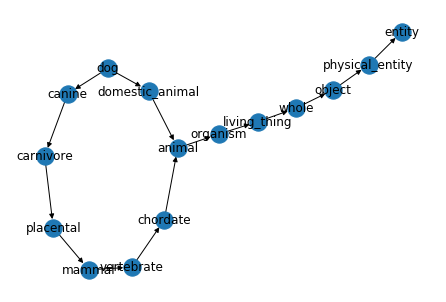

In [54]:
nx.draw(graph, pos=graphviz_layout(graph), labels=labels)

In [58]:
def wordnet_graph(words):
     
    """
    Construct a semantic graph and labels for a set of object categories using 
    WordNet and NetworkX. 

    Parameters: 
    ----------
     words : set
         Set of words for all the categories. 

     Returns: 
     -------
     graph : graph
         Graph object containing edges and nodes for the network. 
     labels : dict
         Dictionary of all synset labels. 
     """
     
    graph = nx.DiGraph()
    labels = {}
    seen = set()

    def recurse(s):

        """ Recursively move up semantic hierarchy and add nodes / edges """  

        if not s in seen:                               # if not seen...
            seen.add(s)                                 # add to seen
            print(f's.name: {s.name}')
            graph.add_node(s.name)                      # add node
            labels[s.name] = s.name().split(".")[0]     # add label
            hypernyms = s.hypernyms()                   # get hypernyms

            for s1 in hypernyms:                        # for hypernyms
                graph.add_node(s1.name)                 # add node
                graph.add_edge(s.name, s1.name())         # add edge between
                recurse(s1)                             # do so until top

    # build network containing all categories          
    for word in words:                                  # for all categories
        s = wn.synset(str(word) + str('.n.01'))         # create synset            
        recurse(s)                                      # call recurse

    # return the graph and labels    
    return graph , labels

In [59]:
categories = set()
categories.add('airplane')
categories.add('automobile')
categories.add('bird')
categories.add('cat')
categories.add('deer')
categories.add('dog')
categories.add('frog')
categories.add('horse')
categories.add('ship')
categories.add('truck')

In [60]:
# create the graph and labels
graph, labels = wordnet_graph(categories)
 
print(f'labels: {labels}')

s.name: <bound method Synset.name of Synset('cat.n.01')>
s.name: <bound method Synset.name of Synset('feline.n.01')>
s.name: <bound method Synset.name of Synset('carnivore.n.01')>
s.name: <bound method Synset.name of Synset('placental.n.01')>
s.name: <bound method Synset.name of Synset('mammal.n.01')>
s.name: <bound method Synset.name of Synset('vertebrate.n.01')>
s.name: <bound method Synset.name of Synset('chordate.n.01')>
s.name: <bound method Synset.name of Synset('animal.n.01')>
s.name: <bound method Synset.name of Synset('organism.n.01')>
s.name: <bound method Synset.name of Synset('living_thing.n.01')>
s.name: <bound method Synset.name of Synset('whole.n.02')>
s.name: <bound method Synset.name of Synset('object.n.01')>
s.name: <bound method Synset.name of Synset('physical_entity.n.01')>
s.name: <bound method Synset.name of Synset('entity.n.01')>
s.name: <bound method Synset.name of Synset('car.n.01')>
s.name: <bound method Synset.name of Synset('motor_vehicle.n.01')>
s.name: <bo

labels: {<bound method Synset.name of Synset('cat.n.01')>: 'cat', <bound method Synset.name of Synset('feline.n.01')>: 'feline', <bound method Synset.name of Synset('carnivore.n.01')>: 'carnivore', <bound method Synset.name of Synset('placental.n.01')>: 'placental', <bound method Synset.name of Synset('mammal.n.01')>: 'mammal', <bound method Synset.name of Synset('vertebrate.n.01')>: 'vertebrate', <bound method Synset.name of Synset('chordate.n.01')>: 'chordate', <bound method Synset.name of Synset('animal.n.01')>: 'animal', <bound method Synset.name of Synset('organism.n.01')>: 'organism', <bound method Synset.name of Synset('living_thing.n.01')>: 'living_thing', <bound method Synset.name of Synset('whole.n.02')>: 'whole', <bound method Synset.name of Synset('object.n.01')>: 'object', <bound method Synset.name of Synset('physical_entity.n.01')>: 'physical_entity', <bound method Synset.name of Synset('entity.n.01')>: 'entity', <bound method Synset.name of Synset('car.n.01')>: 'car', <b

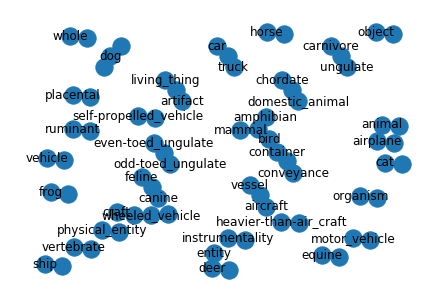

In [62]:
# draw the graph
print(f'labels: {labels}')
nx.draw(graph, pos=pos, labels=labels)
pos=graphviz_layout(graph)
# nx.draw_networkx_labels(graph, pos=pos, labels=labels)
plt.show()